Introduction to Pandas
============

### [PyData 4](http://www.meetup.com/PyData-SG/events/226537892/) // [@eugeneteo](https://twitter.com/eugeneteo)

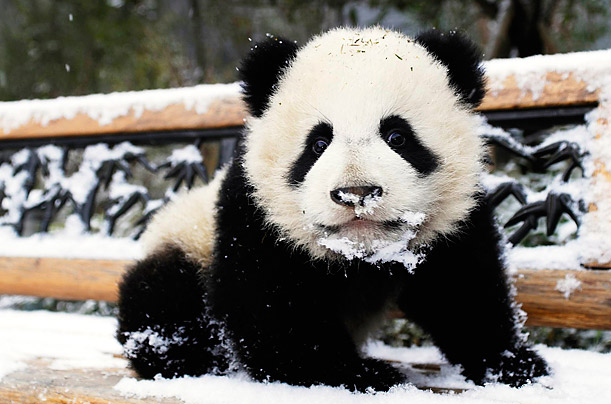

In [1]:
%matplotlib inline

from IPython.display import Image, HTML
Image('http://img.timeinc.net/time/photoessays/2011/panda_wolong/panda_wolong_01.jpg')

Well, more like...

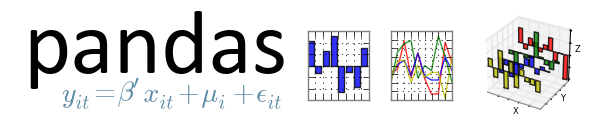

In [2]:
Image('http://pandas.pydata.org/_static/pandas_logo.png')

US Baby Names 1880-2014
----------------------

The following code is based on an introductory example in the book [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793/) by [Wes McKinney](http://wesmckinney.com/).

The [dataset](https://github.com/eugeneteo/pydatasg-pandas-intro/blob/master/names.zip) came from [the United States Social Security Administration (SSA)](http://www.ssa.gov/oact/babynames/limits.html) website.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.__version__

u'0.17.0'

In [5]:
np.__version__

'1.10.1'

In [6]:
names1880 = pd.read_csv('./names/yob1880.txt', names=['name', 'sex', 'births'])

In [7]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


In [8]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [9]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [10]:
years = range(1880, 2015) # up to 2014

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.concat.html
# Concatenate pandas objects along a particular axis with optional set logic along the other axes.
# axis : {0, 1, ...}, default 0 (column-wise)
# ignore_index : boolean, default False
# If True, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, ..., n - 1
#
# http://stackoverflow.com/a/22149930
names = pd.concat(pieces, ignore_index=True)

In [11]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [12]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.pivot_table.html
# Create a spreadsheet-style pivot table as a DataFrame.
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [13]:
total_births

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


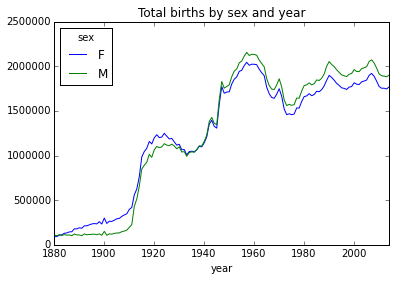

In [14]:
total_births.plot(title='Total births by sex and year')

In [15]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [16]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [17]:
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html
# Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [18]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [19]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))
top1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269877 entries, 0 to 269876
Data columns (total 5 columns):
name      269877 non-null object
sex       269877 non-null object
births    269877 non-null int64
year      269877 non-null int64
prop      269877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.4+ MB


In [20]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Analysing Naming Trends
----------------------

In [21]:
boys = top1000[top1000.sex == 'M']

In [22]:
girls = top1000[top1000.sex == 'F']

In [23]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1880 to 2014
Columns: 7031 entries, Aaden to Zuri
dtypes: float64(7031)
memory usage: 7.2 MB


In [24]:
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [25]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e430090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e8f2910>], dtype=object)

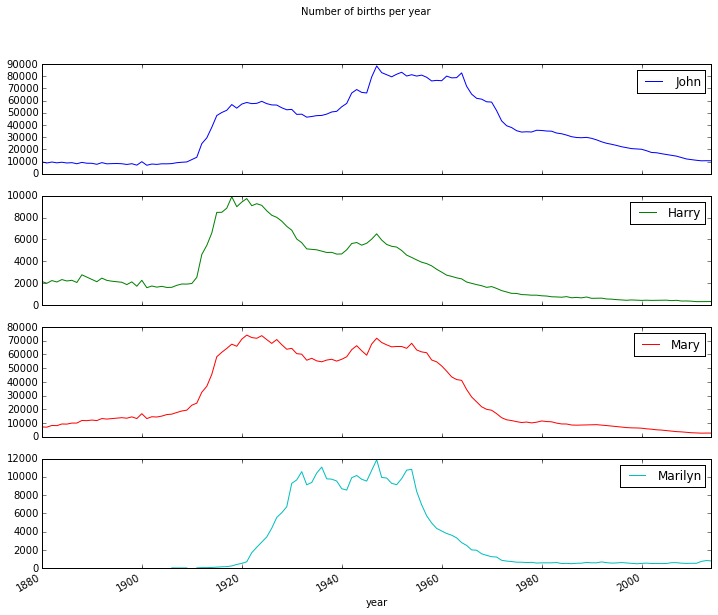

In [26]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

Measuring the increase in naming diversity
------------------------------------------

In [27]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1880 to 2014
Data columns (total 2 columns):
F    135 non-null float64
M    135 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [28]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


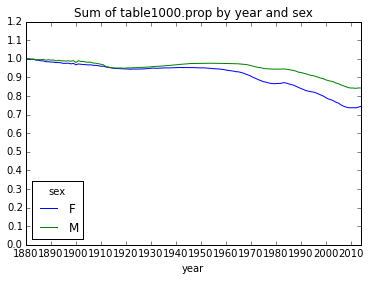

In [29]:
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# Return evenly spaced numbers over a specified interval.
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [30]:
df = boys[boys.year == 2014]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 268877 to 269876
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [31]:
df

,name,sex,births,year,prop
268877,Noah,M,19144,2014,0.010068
268878,Liam,M,18342,2014,0.009647
268879,Mason,M,17092,2014,0.008989
268880,Jacob,M,16712,2014,0.008789
268881,William,M,16687,2014,0.008776
268882,Ethan,M,15619,2014,0.008215
268883,Michael,M,15323,2014,0.008059
268884,Alexander,M,15293,2014,0.008043
268885,James,M,14301,2014,0.007521
268886,Daniel,M,13829,2014,0.007273


In [32]:
# Sort prop in descending order, and accumulate the prop value
# Figure out how many of the most popular names it takes to reach 50%
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [33]:
prop_cumsum[:10]

268877    0.010068
268878    0.019715
268879    0.028704
268880    0.037494
268881    0.046270
268882    0.054485
268883    0.062544
268884    0.070587
268885    0.078108
268886    0.085381
Name: prop, dtype: float64

In [34]:
prop_cumsum.values # Series -> numpy.ndarray

array([ 0.0100685 ,  0.0197152 ,  0.02870448,  0.0374939 ,  0.04627017,
        0.05448475,  0.06254365,  0.07058678,  0.07810817,  0.08538132,
        0.09258348,  0.09978195,  0.10692362,  0.11391645,  0.12068944,
        0.12742614,  0.13380099,  0.14015324,  0.14650548,  0.15281407,
        0.15885706,  0.16467863,  0.17038976,  0.17608353,  0.18174469,
        0.1873196 ,  0.19289399,  0.19838002,  0.20382344,  0.209229  ,
        0.21441893,  0.21934431,  0.2242618 ,  0.22911986,  0.23392848,
        0.23871449,  0.24346158,  0.24814345,  0.25277799,  0.25738465,
        0.2619524 ,  0.26636394,  0.27066609,  0.27489197,  0.27907736,
        0.28309288,  0.28709577,  0.29105606,  0.2949627 ,  0.29881991,
        0.30264293,  0.30642703,  0.31011541,  0.31378223,  0.31736385,
        0.32092968,  0.32446029,  0.32796669,  0.33146889,  0.3349306 ,
        0.33838704,  0.34182613,  0.34526154,  0.3486149 ,  0.3519488 ,
        0.35524273,  0.35853245,  0.36182165,  0.36508508,  0.36

In [35]:
prop_cumsum.values.searchsorted(0.5) + 1 # 50% @ 2014

131

In [36]:
df = boys[boys.year == 1900]

In [37]:
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [38]:
in1990.values.searchsorted(0.5) + 1 # 50% @ 1900 ; the lower the less diverse the names were

25

In [39]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return group.values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
      M       15
1883  F       39
      M       15
1884  F       39
      M       16
1885  F       40
      M       16
1886  F       41
      M       16
1887  F       41
      M       17
1888  F       42
      M       17
1889  F       43
      M       18
1890  F       44
      M       19
1891  F       44
      M       20
1892  F       44
      M       20
1893  F       44
      M       21
1894  F       45
      M       22
            ... 
2000  F      155
      M       77
2001  F      165
      M       81
2002  F      170
      M       83
2003  F      178
      M       87
2004  F      191
      M       92
2005  F      199
      M       96
2006  F      209
      M       99
2007  F      223
      M      103
2008  F      234
      M      109
2009  F      241
      M      114
2010  F      246
      M      117
2011  F      244
      M      120
2012  F      248
      M      124
2013  F      241
    

In [40]:
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


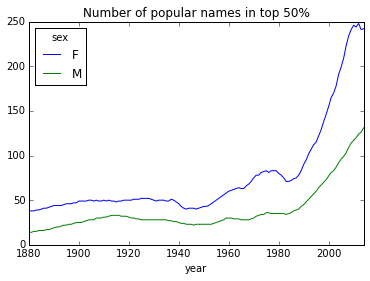

In [41]:
diversity.plot(title='Number of popular names in top 50%')

Boy names that became girl names
------------------------------

In [42]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269877 entries, 0 to 269876
Data columns (total 5 columns):
name      269877 non-null object
sex       269877 non-null object
births    269877 non-null int64
year      269877 non-null int64
prop      269877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.4+ MB


In [43]:
top1000.name.size

269877

In [44]:
all_names = top1000.name.unique() # returns numpy ndarray
all_names.size

7031

In [45]:
mask = np.array(['tris' in x.lower() for x in all_names])

In [46]:
tris_like = all_names[mask]
tris_like

array(['Trisha', 'Trista', 'Tristan', 'Trish', 'Tristen', 'Triston',
       'Tristin', 'Tristian'], dtype=object)

In [47]:
filtered = top1000[top1000.name.isin(tris_like)]
filtered.groupby('name').births.sum()

name
Trish         687
Trisha      36433
Trista       9816
Tristan     99865
Tristen     18890
Tristian     5430
Tristin      8117
Triston      9687
Name: births, dtype: int64

In [48]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table.tail()

sex,F,M
year,,
2010,NaN,7038
2011,NaN,6605
2012,NaN,6232
2013,NaN,5425
2014,NaN,4924


In [49]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sum.html
# Return the sum of the values for the requested axis
table.sum(1).tail() # sum the row (F + M)

year
2010    7038
2011    6605
2012    6232
2013    5425
2014    4924
dtype: float64

In [50]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.div.html
# Floating division of dataframe and other, element-wise (binary operator truediv).
table = table.div(table.sum(1), axis=0) # column
table

sex,F,M
year,,
1961,1.000000,NaN
1963,1.000000,NaN
1964,1.000000,NaN
1965,1.000000,NaN
1966,1.000000,NaN
1967,1.000000,NaN
1968,1.000000,NaN
1969,1.000000,NaN
1970,1.000000,NaN


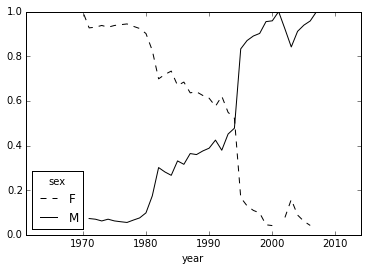

In [51]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [52]:
table.ix[1990:2000].T

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
sex,,,,,,,,,,,
F,0.611886,0.575704,0.621046,0.548567,0.522374,0.167035,0.129806,0.109299,0.097782,0.044877,0.041295
M,0.388114,0.424296,0.378954,0.451433,0.477626,0.832965,0.870194,0.890701,0.902218,0.955123,0.958705


In [53]:
table = filtered.groupby(['year', 'sex', 'name',]).prop.sum()
table.ix[1994:1996]

year  sex  name    
1994  F    Trisha      0.000301
      M    Tristan     0.000254
1995  F    Trisha      0.000236
           Tristan     0.000162
           Tristen     0.000118
      M    Tristan     0.001623
           Tristen     0.000325
           Tristian    0.000083
           Tristin     0.000151
           Triston     0.000195
1996  F    Trisha      0.000189
           Trista      0.000132
           Tristan     0.000220
           Tristen     0.000166
      M    Tristan     0.002883
           Tristen     0.000627
           Tristian    0.000161
           Tristin     0.000332
           Triston     0.000383
Name: prop, dtype: float64

The "Last letter" Revolution
--------------------------

In [54]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters # Series

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1825403    k
1825404    d
1825405    n
1825406    h
1825407    s
1825408    n
1825409    k
1825410    n
1825411    n
1825412    n
1825413    r
1825414    n
1825415    n
1825416    e
1825417    n
1825418    n
1825419    s
1825420    i
1825421    n
1825422    h
1825423    g
1825424    n
1825425    o
1825426    r
1825427    l
1825428    m
1825429    r
1825430    e
1825431    n
1825432    n
Name: name, dtype: object

In [55]:
last_letters.name = 'last_letter'
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [56]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59441   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33380  34080  40399  41913  48089  49616  53884  54353  66750   
f              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
g                7      5     12      8     24     11     18     25     44   
h             4863   4783   5567   5701   6602   6623   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
k               13     15     11     17     21     18     27     19     21   
l             2541   2911   3527   3848   4808   5144   5721   6174   7900   
m               58     57     81     86     79     75    103     90    123   
n             3008   2959   3576   3837   4507   4735   5242   5512   6832   
o               30     49     35     47     74     84     93     97    134   
p              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
q              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
r              481    417    590    640    718    799    917    910   1207   
s             1391   1316   1637   1794   2039   2127   2524   2803   3582   
t             2151   2165   2399   2554   2825   2889   3017   3140   3816   
u              380    427    410    444    490    495    511    476    541   
v              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
w              NaN      5    NaN    NaN    NaN    NaN      5    NaN    NaN   
x              NaN    NaN    NaN      7    NaN    NaN    NaN    NaN    NaN   
y            10468  10404  12144  12063  13918  13927  14933  14980  17929   
z              106     95    106    141    148    150    202    188    238   

sex                  ...         M                                          \
year          1889   ...      2005    2006    2007    2008    2009    2010   
last_letter          ...                                                     
a            58632   ...     36877   36210   34723   32988   31573   28814   
b              NaN   ...     43178   42645   42190   40047   39038   39208   
c              NaN   ...     26102   26661   26893   25365   24127   23307   
d             1374   ...     50730   51474   50686   48018   46310   44758   
e            66661   ...    141237  143126  143915  141234  135857  130073   
f              NaN   ...      1988    1970    2090    2198    2215    2309   
g               28   ...      1884    1931    2045    2063    2400    2693   
h             8825   ...     92582   98635   99608  100544  100407   99125   
i              134   ...     31356   33595   35297   38232   41060   43377   
j              NaN   ...      1293    1243    1255    1383    1419    1475   
k               22   ...     42183   42575   42176   39651   37616   35480   
l             8395   ...    155442  156433  155438  151119  144195  134811   
m              137   ...     41637   42568   43927   44408   46423   47302   
n             7103   ...    686815  721724  742299  735193  717422  693690   
o              142   ...     92054   96405   96989   91593   86572   81522   
p              NaN   ...      2769    2724    2747    2650    2600    2428   
q              NaN   ...       446     431     432     339     377     344   
r             1214   ...    172184  176654  177423  174926  173669  167287   
s             3569   ...    140031  143356  142354  137337  130259  124710   
t             3784   

In [57]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.reindex.html
# Conform DataFrame to new index with optional filling logic, placing NA/NaN in locations having no value in the previous index.
subtable = table.reindex(columns=[1900, 1957, 2014], level='year')

In [58]:
subtable

sex               F                      M                
year           1900    1957    2014   1900    1957    2014
last_letter                                               
a             89916  689273  655469    870    5009   27931
b               NaN     480     573    372    2992   31085
c               NaN      37    1349    299   11363   23617
d              3670    3725    3060  15487  283864   43641
e            107072  437821  328326  22725  183330  131036
f               NaN       7     164    116    4711    2839
g                33     347     690    253   13452    4685
h             15301   87046  127602   6234   84594  100945
i               360   58848   57205    155    1072   46157
j               NaN     NaN     187    NaN     NaN    1350
k                30     262     583   6074   99957   35514
l             14654   78260   44417   9310  233047  126372
m               307   14771    5132  10802   72378   58233
n             18262  289316  233833  20711  319775  668026
o               348    7233    2189   1769   24996   81861
p               NaN      57      58    432   12066    2511
q               NaN     NaN      53    NaN     NaN     310
r              3625   11385   48361  10288   64434  176800
s              9450   29770   21309  20054  237698  127120
t              6966   33091   20824  10259  139463   52016
u               350    1561     787     27     132    3178
v               NaN      74     401     19      63    2963
w                 6      69    3905    949   13383   26401
x               NaN      80    2091    528    3748   18666
y             28868  299679  209187  12743  343976  104595
z               610     968    1020     23     363    3524

In [59]:
subtable.sum() # DataFrame

sex  year
F    1900     299828
     1957    2044160
     2014    1768775
M    1900     150499
     1957    2155866
     2014    1901376
dtype: float64

In [60]:
letter_prop = subtable / subtable.sum().astype(float)

In [61]:
letter_prop

sex                 F                             M                    
year             1900      1957      2014      1900      1957      2014
last_letter                                                            
a            0.299892  0.337191  0.370578  0.005781  0.002323  0.014690
b                 NaN  0.000235  0.000324  0.002472  0.001388  0.016349
c                 NaN  0.000018  0.000763  0.001987  0.005271  0.012421
d            0.012240  0.001822  0.001730  0.102904  0.131671  0.022952
e            0.357111  0.214181  0.185623  0.150998  0.085038  0.068916
f                 NaN  0.000003  0.000093  0.000771  0.002185  0.001493
g            0.000110  0.000170  0.000390  0.001681  0.006240  0.002464
h            0.051033  0.042583  0.072141  0.041422  0.039239  0.053090
i            0.001201  0.028788  0.032342  0.001030  0.000497  0.024276
j                 NaN       NaN  0.000106       NaN       NaN  0.000710
k            0.000100  0.000128  0.000330  0.040359  0.046365  0.018678
l            0.048875  0.038285  0.025112  0.061861  0.108099  0.066463
m            0.001024  0.007226  0.002901  0.071775  0.033573  0.030627
n            0.060908  0.141533  0.132201  0.137616  0.148328  0.351338
o            0.001161  0.003538  0.001238  0.011754  0.011594  0.043054
p                 NaN  0.000028  0.000033  0.002870  0.005597  0.001321
q                 NaN       NaN  0.000030       NaN       NaN  0.000163
r            0.012090  0.005570  0.027342  0.068359  0.029888  0.092985
s            0.031518  0.014563  0.012047  0.133250  0.110256  0.066857
t            0.023233  0.016188  0.011773  0.068167  0.064690  0.027357
u            0.001167  0.000764  0.000445  0.000179  0.000061  0.001671
v                 NaN  0.000036  0.000227  0.000126  0.000029  0.001558
w            0.000020  0.000034  0.002208  0.006306  0.006208  0.013885
x                 NaN  0.000039  0.001182  0.003508  0.001739  0.009817
y            0.096282  0.146603  0.118267  0.084672  0.159554  0.055010
z            0.002034  0.000474  0.000577  0.000153  0.000168  0.001853

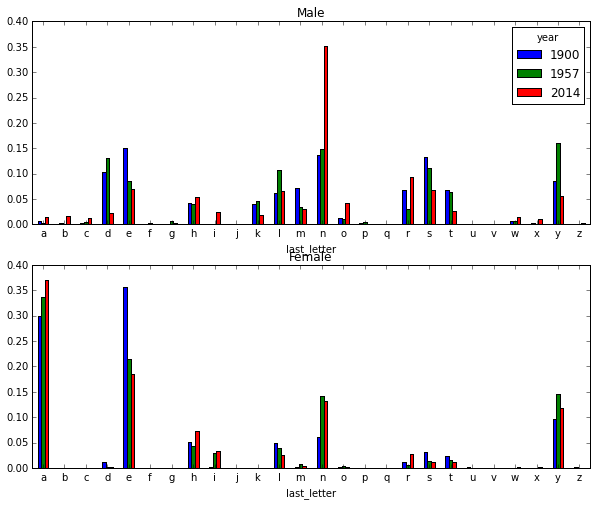

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8)) # 2 rows
letter_prop.M.plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop.F.plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [63]:
table.head()

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59441   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33380  34080  40399  41913  48089  49616  53884  54353  66750   

sex                  ...         M                                          \
year          1889   ...      2005    2006    2007    2008    2009    2010   
last_letter          ...                                                     
a            58632   ...     36877   36210   34723   32988   31573   28814   
b              NaN   ...     43178   42645   42190   40047   39038   39208   
c              NaN   ...     26102   26661   26893   25365   24127   23307   
d             1374   ...     50730   51474   50686   48018   46310   44758   
e            66661   ...    141237  143126  143915  141234  135857  130073   

sex                                          
year           2011    2012    2013    2014  
last_letter                                  
a             27384   27136   27299   27931  
b             36605   34626   33089   31085  
c             23085   24209   23970   23617  
d             43158   42376   42533   43641  
e            128572  128174  131725  131036  

[5 rows x 270 columns]

In [64]:
letter_prop = table / table.sum().astype(float)

In [65]:
letter_prop.head()

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343443  0.338767  0.341254  0.338547  0.341272   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006479   
e            0.366841  0.370620  0.374585  0.373154  0.372719  0.372898   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2005   
last_letter                                            ...                
a            0.339710  0.335261  0.332766  0.328717    ...     0.018486   
b                 NaN       NaN       NaN       NaN    ...     0.021645   
c                 NaN       NaN       NaN       NaN    ...     0.013085   
d            0.006967  0.007035  0.007267  0.007703    ...     0.025431   
e            0.372809  0.372327  0.373684  0.373732    ...     0.070801   

sex                                                                      \
year             2006      2007      2008      2009      2010      2011   
last_letter                                                               
a            0.017643  0.016757  0.016200  0.015952  0.015056  0.014464   
b            0.020778  0.020361  0.019667  0.019723  0.020486  0.019335   
c            0.012990  0.012978  0.012456  0.012190  0.012178  0.012193   
d            0.025080  0.024461  0.023581  0.023397  0.023386  0.022796   
e            0.069737  0.069452  0.069359  0.068639  0.067964  0.067911   

sex                                        
year             2012      2013      2014  
last_letter                                
a            0.014362  0.014509  0.014690  
b            0.018326  0.017587  0.016349  
c            0.012813  0.012740  0.012421  
d            0.022428  0.022606  0.022952  
e            0.067838  0.070012  0.068916  

[5 rows x 270 columns]

In [66]:
letter_prop.ix[['d', 'n', 'y'], 'M'] # Male [[row,...], col]

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
last_letter,,,,,,,,,,,,,,,,,,,,,
d,0.083057,0.083240,0.085339,0.084059,0.086120,0.085473,0.087648,0.089071,0.087710,0.091921,...,0.025431,0.025080,0.024461,0.023581,0.023397,0.023386,0.022796,0.022428,0.022606,0.022952
n,0.153216,0.153209,0.149558,0.151650,0.149924,0.146354,0.149661,0.148845,0.151291,0.151984,...,0.344296,0.351653,0.358228,0.361046,0.362462,0.362458,0.364154,0.360269,0.354485,0.351338
y,0.075762,0.077453,0.077537,0.079146,0.080405,0.081883,0.081681,0.082868,0.084921,0.086333,...,0.062807,0.060342,0.059643,0.060346,0.057242,0.058183,0.058074,0.057568,0.056305,0.055010


In [67]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [68]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


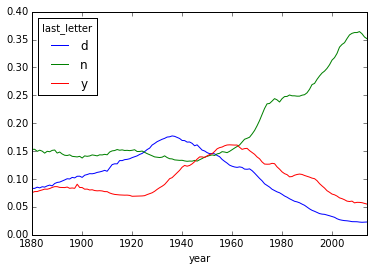

In [69]:
dny_ts.plot()